#BACKGROUND

Amazon Web Services (AWS) is a comprehensive and widely adopted cloud platform that offers a variety of infrastructure and application services. As part of its offerings, AWS provides Software-as-a-Service (SaaS) solutions designed to help businesses develop their products in a scalable and efficient manner. AWS SaaS is a developed product that allows organizations to deploy applications quickly, enhance operational efficiency, and foster innovation, making it suitable for startups and large enterprises alike​.

The AWS SaaS approach promotes agility by providing tools and best practices that assist companies in building, migrating, and modernizing their applications on the cloud. This flexibility enables organizations to address customer challenges effectively while ensuring security and compliance across different industries. By leveraging the AWS Marketplace, companies can further expand their reach and revenue, highlighting the potential for significant growth in the SaaS market​.

For more details, you can explore the AWS SaaS resources:
https://aws.amazon.com/saas/


#PROBLEM STATEMENT & OBJECTIVE

As global demand for cloud-based solutions grows, competition among SaaS providers intensifies, revealing significant profit differences across regions. While the SaaS industry is expanding, the Asia-Pacific and Japan (APJ) region faces unique challenges that limit its profit margins. Companies in APJ often struggle to achieve the same levels of profitability as their counterparts in the America (AMER) and Europe, the Middle East and Africa (EMEA) regions. This situation raises important questions about the factors affecting sales performance in APJ and underscores the need for focused analysis to identify areas for improvement.

Based on sales data from 2020 to 2023, the APJ region's profit margin (3%) lags significantly behind AMER (15%) and EMEA (14%). This analysis aims to investigate the key factors affecting sales performance in APJ to identify drivers of low profitability and recommend strategies for improvement.

Here are the use cases that will be examined:
1. Sales Performance Analysis: Provide summary of sales performance and profitability in the APJ region compared to AMER and EMEA.

2. Correlation Analysis: Exploring the Relationship Between Discounts, Quantity, Sales Volume, and Profit in APJ to determine if discounting strategies are reducing profit margins.

[Problem Statement]

As a data analyst, we will attempt to answer the following:
- What specific strategies can be implemented to increase the profitability of the APJ region from 3% to 12% within the next 3 years?

# DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

## DATA INGESTION
Data Overview: Top 5 and Bottom 5

In [ ]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480




---


## DATA UNDERSTANDING

Prior to analysis, it is necessary to understand the dataset in the data understanding phase. This process helps identify any anomalies that need to be addressed in the data cleaning phase. Each anomaly correction will be supported by justifications, either through domain knowledge or statistical reasoning.

In [ ]:
print('[Data Before Cleansing]')
print(f'The total row of this data is {df.shape[0]}')
print(f'The total column of this data is {df.shape[1]}')

[Data Before Cleansing]
The total row of this data is 9994
The total column of this data is 19


### Check the data types and label

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

The data provides information on Online Retail Shipping and consists of 19 columns, which include:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

[Findings]

1) The data type of this column needs to be changed:

'Order Date' from 'object' to 'datetime'.
- Reason: it represents a date and time value, which is more appropriately stored as a datetime data type for easier manipulation

2) Some of the column headers must be changed in order to fulfill the correct format:
- Row ID -> Row_ID
- Order ID -> Order_ID
- Order Date -> Order_Date
- Date Key -> Date_Key
- Contact Name -> Contact_Name
- Customer ID -> Customer_ID

### Check the typo (Unique Values)

In [ ]:
for column_name in df:
  print(df[column_name].value_counts())
  print('\n')

Row ID
1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: count, Length: 9994, dtype: int64


Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64


Order Date
9/6/2022      38
9/3/2023      36
11/11/2022    35
12/2/2023     34
12/3/2023     34
              ..
2/25/2022      1
10/26/2022     1
2/22/2020      1
10/19/2022     1
1/22/2020      1
Name: count, Length: 1237, dtype: int64


Date Key
20220906    38
20230903    36
20221111    35
20231202    34
20231203    34
            ..
20220225     1
20221026     1
20200222     1
20221019     1
20200122     1
Name: count, Length: 1237, dtype: int64


Contact Name
Leonard Kelly       37
Gordon Parr         34
Amelia Campbell     34

In [ ]:
pd.set_option('display.max_colwidth', None)
# show the unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

- From the data shown above and through the use of visuals, there are no typos in the values of each column so far.
- No NaN values (missing values) were detected, but we will recheck using the isna() function.

### Check the Missing Values

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


No missing values were found

### Check the Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


No duplicates data were found

to ensure, we will check for the duplicates data in each column

In [ ]:
print('[Total Duplicate Value]')
for column_name in df:
  print(column_name,':', df[column_name].duplicated().sum())

[Total Duplicate Value]
Row ID : 0
Order ID : 4985
Order Date : 8757
Date Key : 8757
Contact Name : 9201
Country : 9946
City : 9732
Region : 9991
Subregion : 9982
Customer : 9895
Customer ID : 9895
Industry : 9984
Segment : 9991
Product : 9980
License : 0
Sales : 4169
Quantity : 9980
Discount : 9982
Profit : 2707


- Row ID:
No duplicate values were found, as each transaction is uniquely identifies

- Order ID:
4985 duplicate values -> need to check further as it may consists of multiple items (for example, the Order ID may repeat across multiple rows, with each row representing a different product or service under the same order).

- Customer ID:
9895 duplciate values -> Customer ID CAN contains duplicate value because one customer can make repeat purchases.

- Other Fields:
Fields like Order Date, Customer, Product, etc., CAN contains duplicate values because these fields do not uniquely identify each transaction but rather represent attributes that could be shared across different transactions.

Check the duplicate values in Order ID column

In [ ]:
duplicate_orders = df[df['Order ID'].duplicated()]
duplicate_orders.sort_values(by='Order ID').head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6288,6289,AMER-2020-100090,7/8/2020,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,196.704,6,0.2,68.8464
3836,3837,AMER-2020-100363,4/8/2020,20200408,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,19.008,3,0.2,6.8904
6317,6318,AMER-2020-100762,11/24/2020,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,Support,5F2LX40BDP,15.960,2,0.0,7.9800
6316,6317,AMER-2020-100762,11/24/2020,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,Support,V5SQA48WYZ,144.120,3,0.0,69.1776
6315,6316,AMER-2020-100762,11/24/2020,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,FinanceHub,QLK9TG5206,196.620,2,0.0,96.3438


From the data, we now understand that **Order ID can contains duplicates values**, so we don't need to delete the duplicate values.
- For example, the order ID AMER-2020-100762 has 3 duplicate values, but they have different Product, License, Sales, and Quantity.

In conclusion, No duplicate values were found.

### Check the Outliers

identify the outliers of numerical data using Boxplot

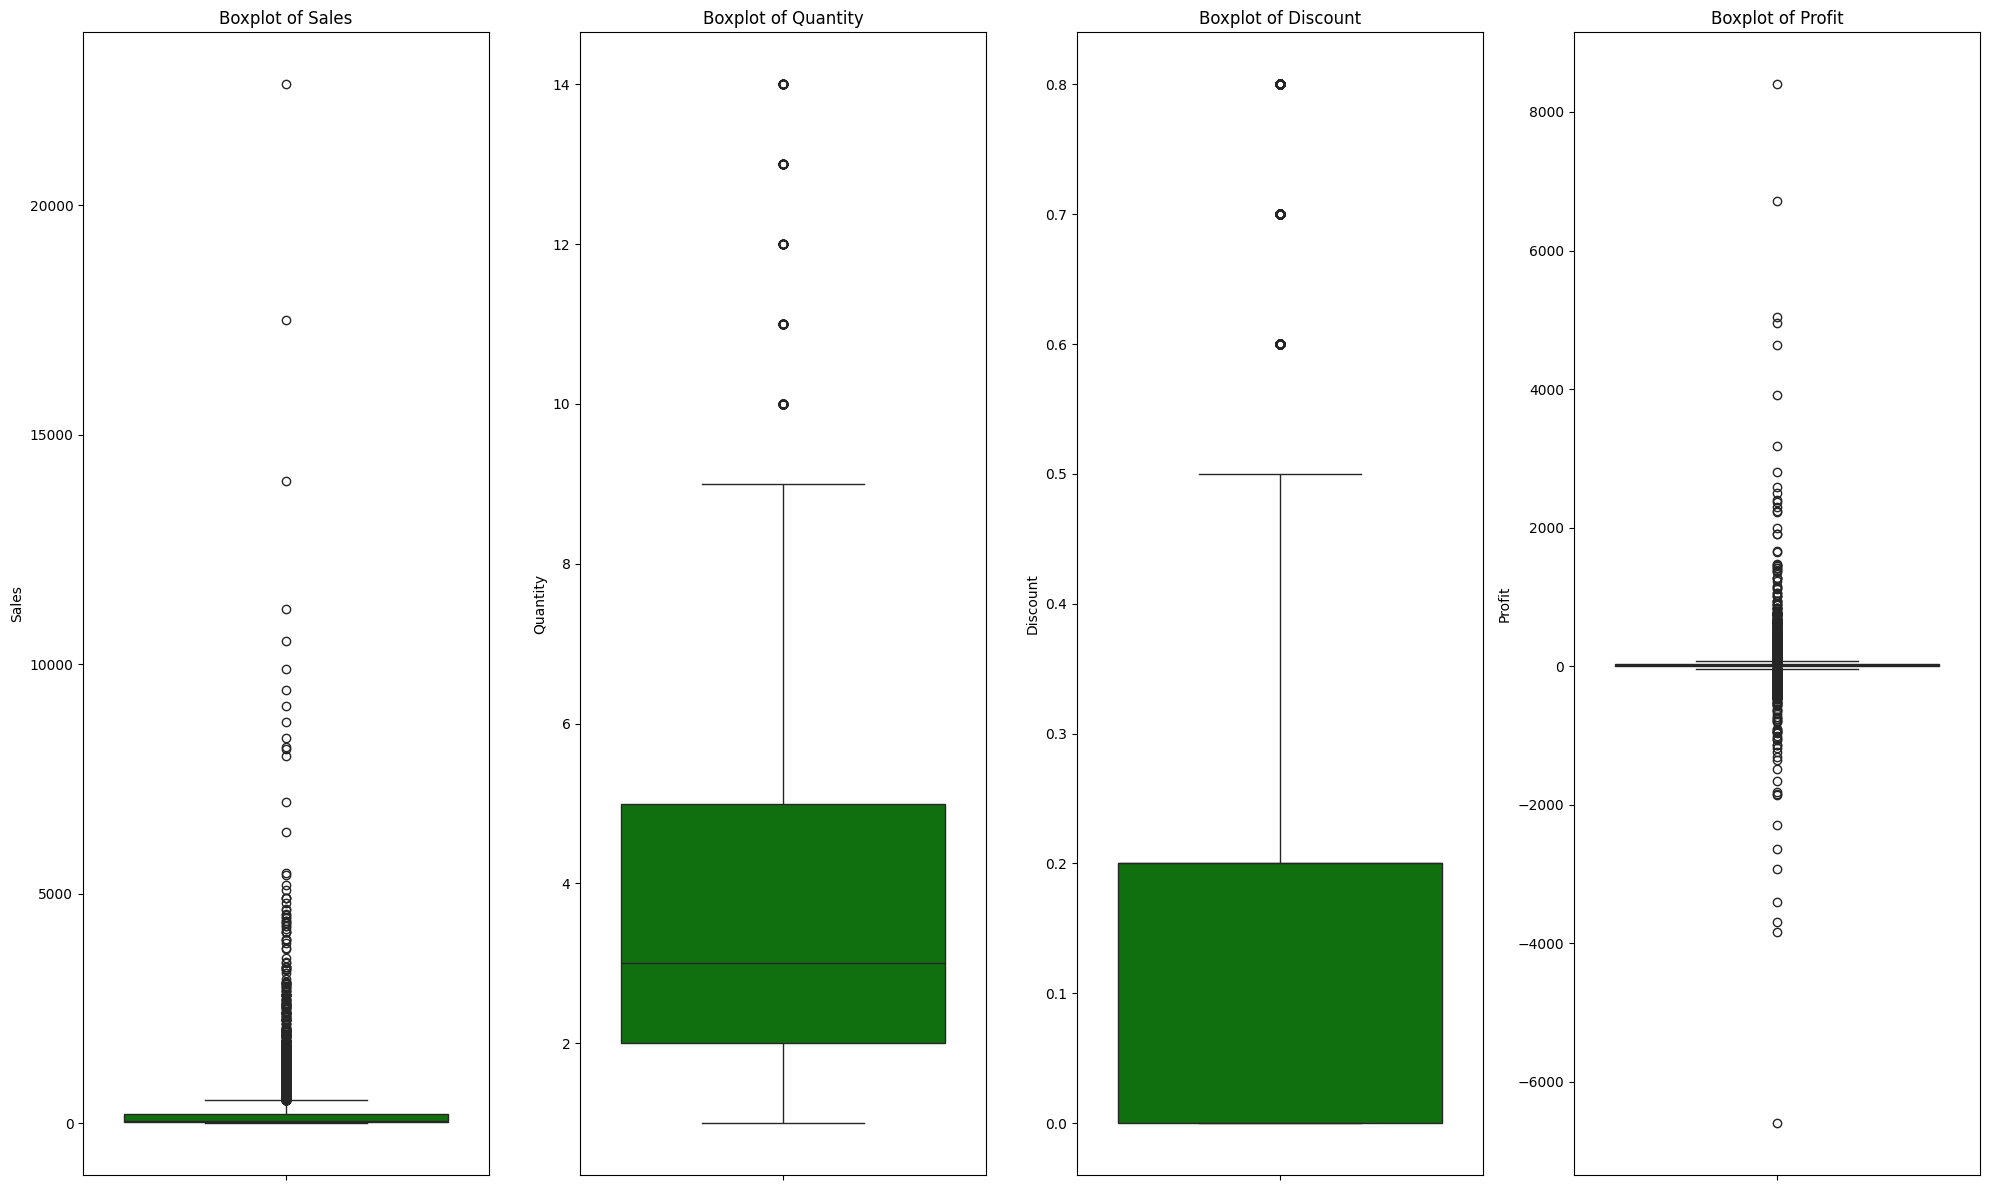

In [ ]:
numdat = ['Sales', 'Quantity', 'Discount', 'Profit']

plt.figure(figsize=(20,12))
for i in range(0,len(numdat)):
    plt.subplot(1, len(numdat), i+1)
    sns.boxplot(y=df[numdat[i]], color='green')
    plt.title(f'Boxplot of {numdat[i]}')
    plt.tight_layout()

In [ ]:
for col in numdat:
    print('[',col,']')
    # Calculate the IQR value
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define value
    lower_lim = round(Q1 - (1.5*IQR),2)
    upper_lim = round(Q3 + (1.5*IQR),2)

    #Quantity and Discounts values logically cannot be negative.
    if col in ['Quantity', 'Discount']:
        lower_lim = 0

    print('Lower Bound:', lower_lim)
    print('Upper Bound:', upper_lim)

    # Count the total of Outliers
    Outliers = (df[col] < lower_lim) | (df[col] > upper_lim)
    Total_outliers = Outliers.sum()
    print('Total Outliers:', Total_outliers)
    print('\n')

[ Sales ]
Lower Bound: -271.71
Upper Bound: 498.93
Total Outliers: 1167


[ Quantity ]
Lower Bound: 0
Upper Bound: 9.5
Total Outliers: 170


[ Discount ]
Lower Bound: 0
Upper Bound: 0.5
Total Outliers: 856


[ Profit ]
Lower Bound: -39.72
Upper Bound: 70.82
Total Outliers: 1881




Summary:
- Sales: There are 1,167 outliers, showing that some transactions involve very large amounts, possibly due to big customer purchases or currency exchange fluctuations that significantly affect the total sales figures.

- Quantity: There are 170 outliers, with most values more than 9.5, the number of items per order suggests some customers ordered more than usual, possibly indicating bulk orders.

- Discount:  There are 856 outliers in discounts, with most values more than 0.5, likely indicating special deals or promotions offered to certain customers.

- Profit: There are 1,881 outliers for profit, meaning some transactions resulted in either very high or very low profits, possibly due to large orders or heavy discounts.

**In this section on data understanding, I will keep the outlier data and conduct further analysis, focusing primarily on the APJ region**



---


## DATA CLEANING

[To-Do]

1) Change the data type of the column below:

'Order Date' from 'object' to 'datetime'.
- Reason: it represents a date and time value, which is more appropriately stored as a datetime data type for easier manipulation

2) Change the label of the column below:
- Row ID -> Row_ID
- Order ID -> Order_ID
- Order Date -> Order_Date
- Date Key -> Date_Key
- Contact Name -> Contact_Name
- Customer ID -> Customer_ID

3) Adding data:
- profit margin, transaction size, and discoutn level

Before performing data cleaning, it's recommended to create a copy of the dataframe to avoid altering the original format.

In [ ]:
df_clean = df.copy()

### Adding Column

Since we need to analyze profitability, we can add new column for 'Proft Margin' by using this formula:

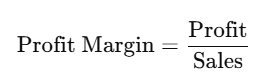

In [ ]:
df_clean['Profit_margin'] = round((df['Profit'] / df['Sales']) * 100, 2)

df_clean['Transaction_size'] = df_clean['Sales'] / df_clean['Quantity']

discount_median = df_clean['Discount'].median()
df_clean['Discount_Level'] = df_clean['Discount'].apply(lambda x: 'High' if x >= discount_median else 'Low')
df_clean.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit_margin,Transaction_size,Discount_Level
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,130.9800,Low
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,243.9800,Low
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00,7.3100,Low
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,191.5155,High
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,11.1840,High


### Change the Column label

In [ ]:
df_clean.rename(columns={'Row ID': 'Row_ID', 'Order ID': 'Order_ID', 'Order Date': 'Order_Date', 'Date Key': 'Date_Key', 'Contact Name': 'Contact_Name', 'Customer ID': 'Customer_ID'}, inplace=True)

### Change the data type

In [ ]:
df_clean[['Order_Date']] = df_clean[['Order_Date']].apply(pd.to_datetime)

In [ ]:
#Re-check the data type and column label
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row_ID            9994 non-null   int64         
 1   Order_ID          9994 non-null   object        
 2   Order_Date        9994 non-null   datetime64[ns]
 3   Date_Key          9994 non-null   int64         
 4   Contact_Name      9994 non-null   object        
 5   Country           9994 non-null   object        
 6   City              9994 non-null   object        
 7   Region            9994 non-null   object        
 8   Subregion         9994 non-null   object        
 9   Customer          9994 non-null   object        
 10  Customer_ID       9994 non-null   int64         
 11  Industry          9994 non-null   object        
 12  Segment           9994 non-null   object        
 13  Product           9994 non-null   object        
 14  License           9994 n

The data types are now aligned with the requirements



---


## CLEANED DATA

In [ ]:
df_clean.head()

,Row_ID,Order_ID,Order_Date,Date_Key,Contact_Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit_margin,Transaction_size,Discount_Level
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,130.9800,Low
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,243.9800,Low
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00,7.3100,Low
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,191.5155,High
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,11.1840,High


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row_ID            9994 non-null   int64         
 1   Order_ID          9994 non-null   object        
 2   Order_Date        9994 non-null   datetime64[ns]
 3   Date_Key          9994 non-null   int64         
 4   Contact_Name      9994 non-null   object        
 5   Country           9994 non-null   object        
 6   City              9994 non-null   object        
 7   Region            9994 non-null   object        
 8   Subregion         9994 non-null   object        
 9   Customer          9994 non-null   object        
 10  Customer_ID       9994 non-null   int64         
 11  Industry          9994 non-null   object        
 12  Segment           9994 non-null   object        
 13  Product           9994 non-null   object        
 14  License           9994 n

Convert the data to CSV and XLSX formats so that it can be downloaded

In [ ]:
# df_clean.to_csv('SaaS-Sales_Cleaned.csv', index=False)
# df_clean.to_excel('SaaS-Sales_Cleaned.xlsx', index=False)

Download the data

In [ ]:
# !pip install google.colab
# from google.colab import files

# files.download('SaaS-Sales_Cleaned.csv')
# files.download('SaaS-Sales_Cleaned.xlsx')



---


## DATA ANALYSIS

In [ ]:
df_da = df_clean.copy()
df_da.head()

,Row_ID,Order_ID,Order_Date,Date_Key,Contact_Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit_margin,Transaction_size,Discount_Level
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,130.9800,Low
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,243.9800,Low
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00,7.3100,Low
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,191.5155,High
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,11.1840,High


In [ ]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row_ID            9994 non-null   int64         
 1   Order_ID          9994 non-null   object        
 2   Order_Date        9994 non-null   datetime64[ns]
 3   Date_Key          9994 non-null   int64         
 4   Contact_Name      9994 non-null   object        
 5   Country           9994 non-null   object        
 6   City              9994 non-null   object        
 7   Region            9994 non-null   object        
 8   Subregion         9994 non-null   object        
 9   Customer          9994 non-null   object        
 10  Customer_ID       9994 non-null   int64         
 11  Industry          9994 non-null   object        
 12  Segment           9994 non-null   object        
 13  Product           9994 non-null   object        
 14  License           9994 n

### 1) Sales Performance Analysis

The objective of this analysis is to provide summary of sales performance and profitability in the APJ region compared to AMER and EMEA.


#### By Geography

Region-Level Analysis:
- How do total sales, average transaction size, and profitability compare among APJ, AMER, and EMEA regions?
- Which region shows the lowest overall sales and profit margins?

Country-Level Analysis:
-  Which country shows the lowest overall sales and profit margins?
- Are there particular cities in APJ where performance is lower than expected?

City-Level Analysis:
- Which cities within each region show the lowest sales and profit margins?
- Are there particular cities in APJ where performance is lower than expected?


##### [Region-Level Analysis]

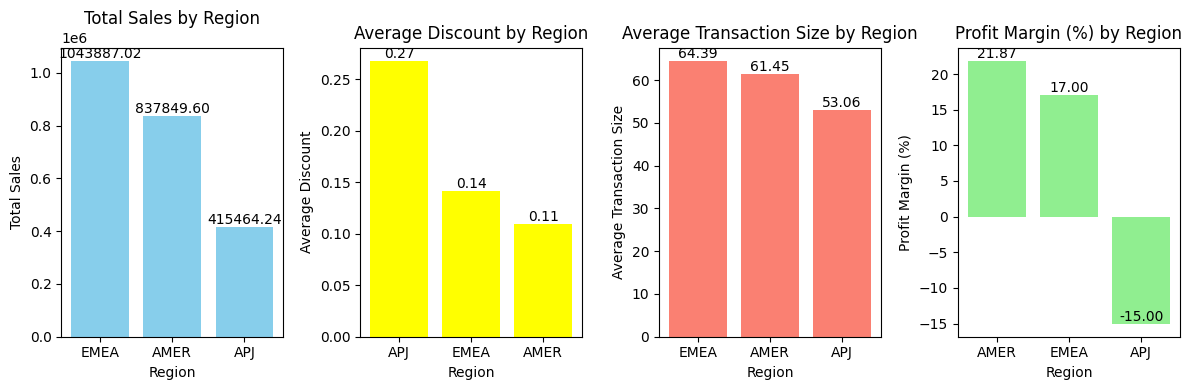

In [ ]:
#Add a column for transaction size (Sales divided by Quantity)
df_da['transaction_size'] = df_da['Sales'] / df_da['Quantity']

#Group data by region and calculate total sales, average transaction size, and profit margin
region_summary = df_da.groupby('Region').agg(
    total_sales=('Sales', 'sum'),
    discount=('Discount', 'mean'),
    avg_transaction_size=('transaction_size', 'mean'),
    profit_margin=('Profit_margin', 'mean')  # Using the existing 'Profit Margin' column
)

#Define metrics and labels for the loop
metrics = {
    'total_sales': 'Total Sales',
    'discount': 'Average Discount',
    'avg_transaction_size': 'Average Transaction Size',
    'profit_margin': 'Profit Margin (%)'
}

# Plot using a loop for subplots
plt.figure(figsize=(12, 4))

for i, (metric, label) in enumerate(metrics.items(), 1):
    # Sort data in descending order by the current metric
    sorted_data = region_summary.sort_values(by=metric, ascending=False)

    # Create subplot
    plt.subplot(1, 4, i)
    bars = plt.bar(sorted_data.index, sorted_data[metric], color=['skyblue', 'yellow', 'salmon', 'lightgreen'][i-1])
    plt.xlabel('Region')
    plt.ylabel(label)
    plt.title(f'{label} by Region')

    # Display values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Compared to AMER and EMEA, APJ has the lowest total sales, average transaction size, and profit margin. Additionally, APJ is the only region with an overall negative profit margin, despite having positive sales. This may be due to APJ having the highest average discount (0.27), which reduces the margin on each sale. When discounts are too high, they can drive profitability into the negative, even if sales volumes are high.

Summary:
- Compared to AMER and EMEA, APJ has the lowest total sales, average transaction size, and profit margin, while having the highest average discount.
- For profit margin, only APJ has an overall negative value.


##### [Country-level & City-Level Analysis]

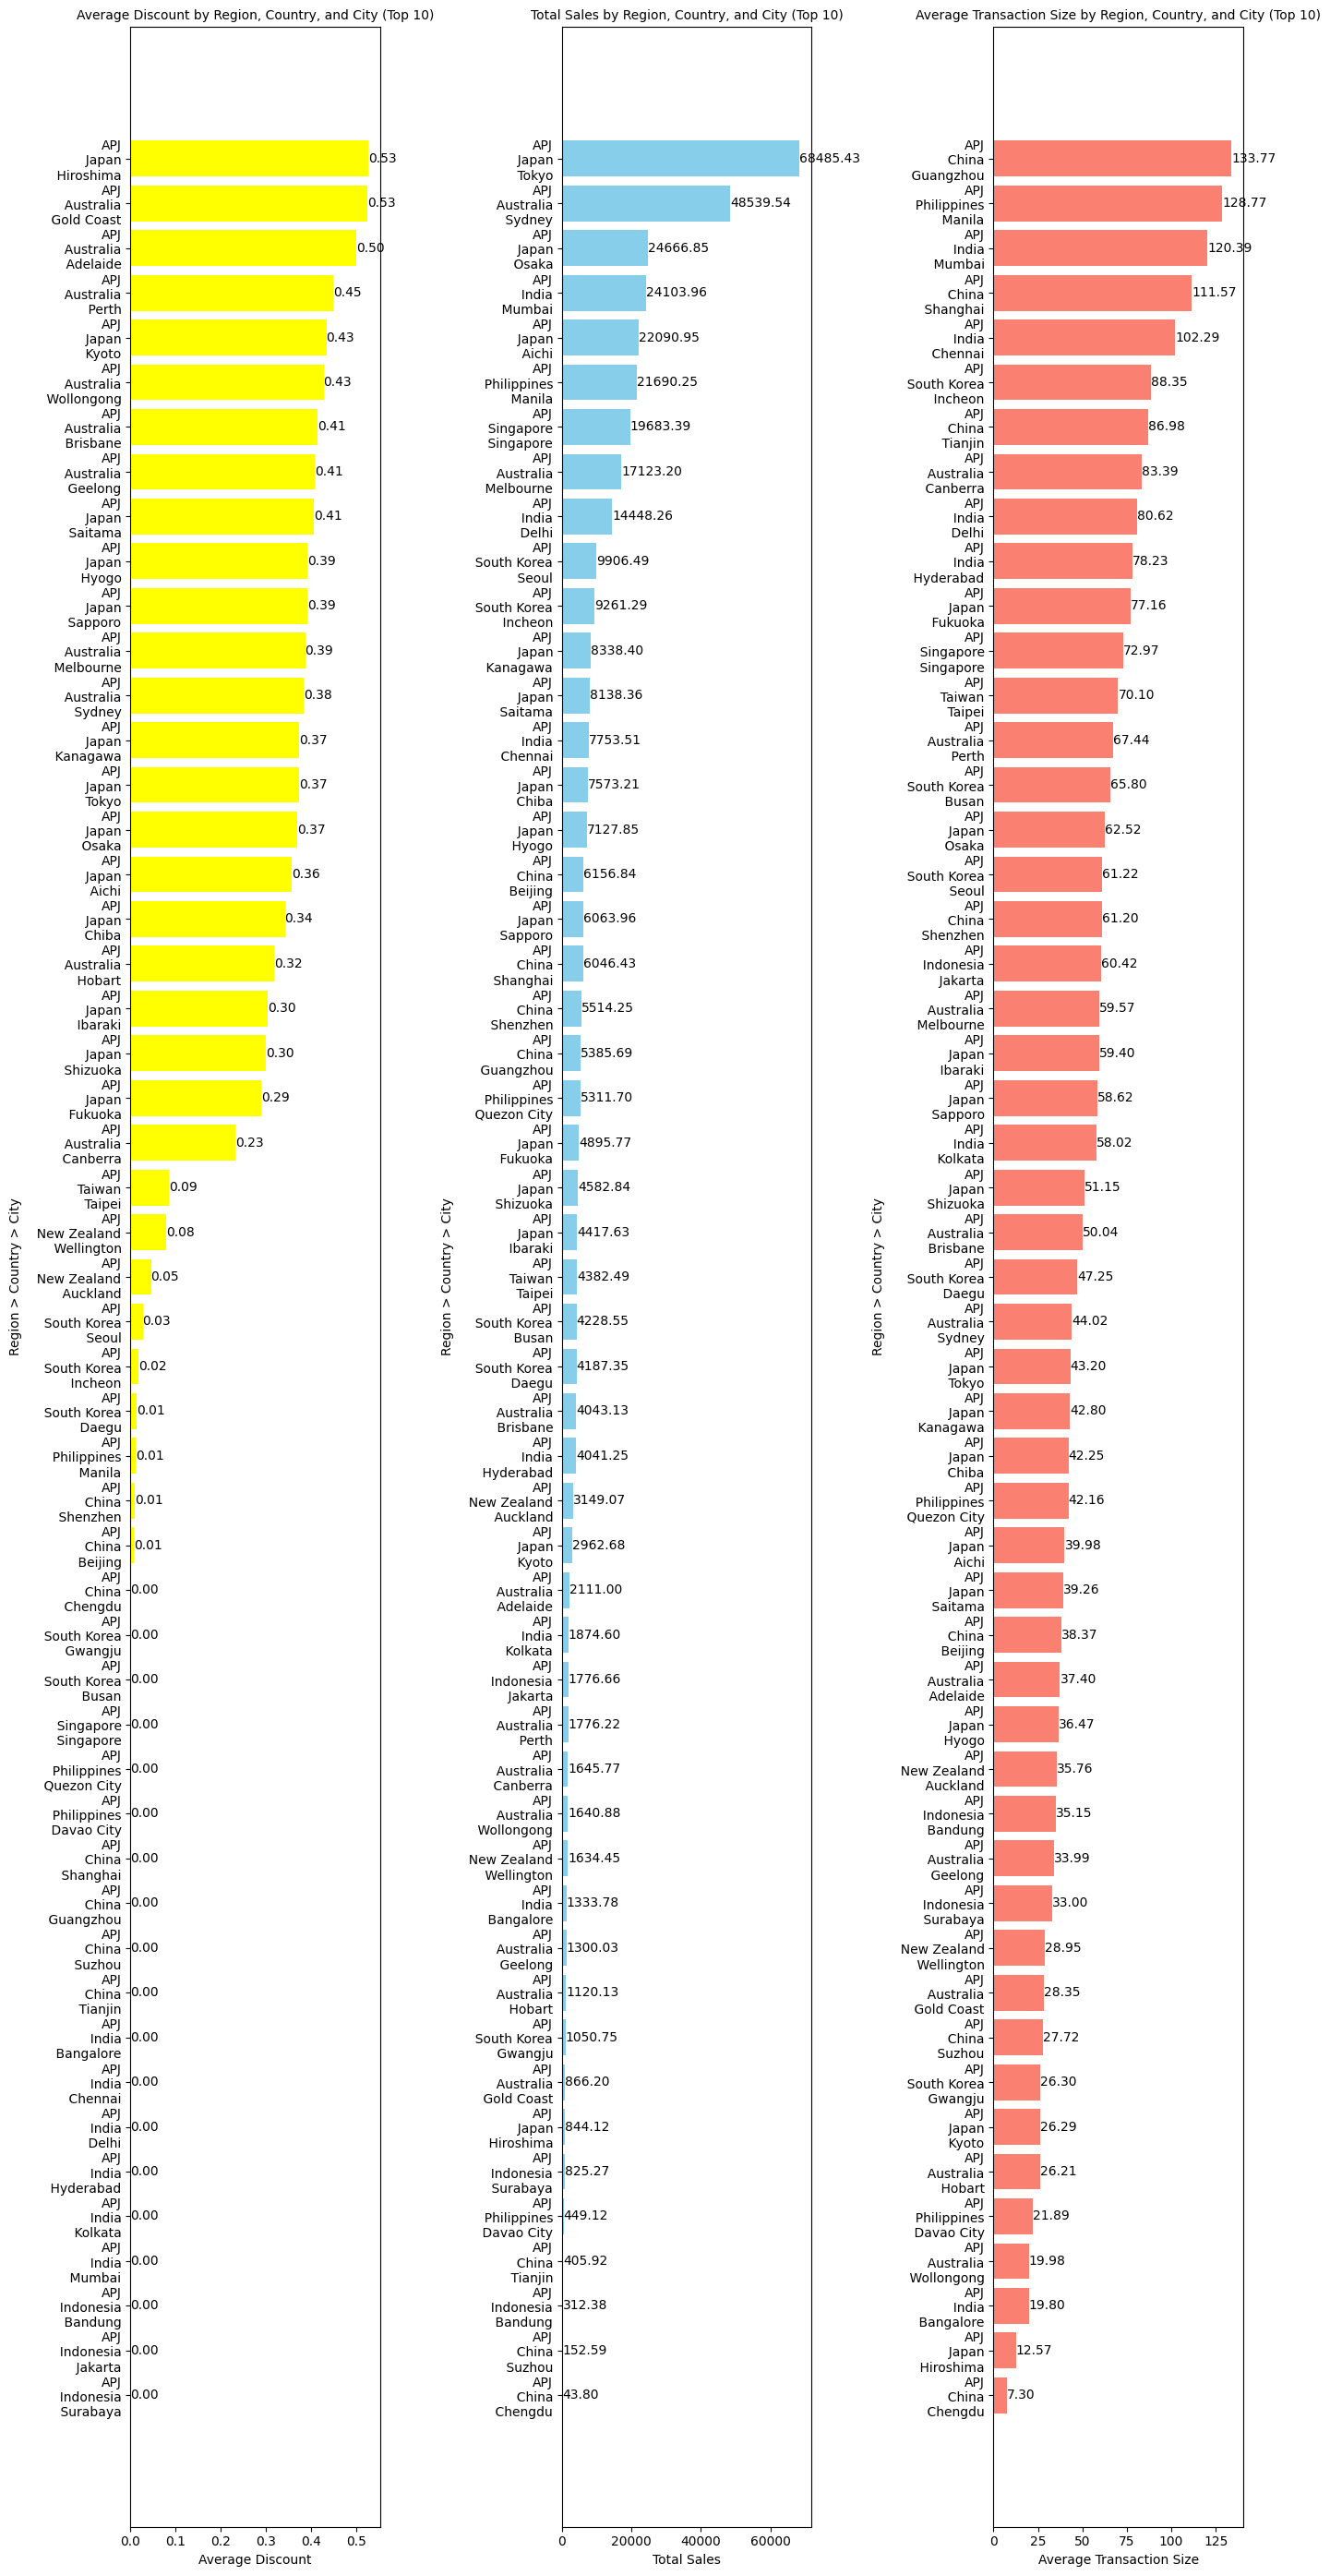

In [ ]:
#filter only APJ region
apj_reg = df_da[df_da['Region'] == 'APJ']

#Add a column for transaction size (Sales divided by Quantity)
apj_reg['transaction_size'] = apj_reg['Sales'] / apj_reg['Quantity']

#Group data by Region, Country, and City and calculate total sales, average transaction size, and profit margin
region_country_city_summary = apj_reg.groupby(['Region', 'Country', 'City']).agg(
    total_sales=('Sales', 'sum'),
    discount=('Discount', 'mean'),
    avg_transaction_size=('transaction_size', 'mean')
).reset_index()

#Define metrics and labels for the loop
metrics = {
    'discount': 'Average Discount',
    'total_sales': 'Total Sales',
    'avg_transaction_size': 'Average Transaction Size',
}

# Prepare to visualize the hierarchical structure
def format_index(row):
    # Access the data using the index
    region = row['Region']
    country = row['Country']
    city = row['City']
    return f"{region}\n  {country}\n    {city}"

# Plotting using a loop for each metric
plt.figure(figsize=(14, 28))

for i, (metric, label) in enumerate(metrics.items(), 1):
    # Sort data for the current metric
    sorted_data = region_country_city_summary.sort_values(by=metric, ascending=True)

    # Create formatted labels for hierarchy
    # Apply the function to the DataFrame rows instead of the index
    labels = sorted_data.apply(lambda row: format_index(row), axis=1)

    # Create subplot
    plt.subplot(1, 3, i)
    bars = plt.barh(labels, sorted_data[metric], color=[ 'yellow', 'skyblue', 'salmon'][i-1])
    plt.xlabel(label, fontsize=10)
    plt.ylabel('Region > Country > City', fontsize=10)
    #title size
    plt.title(f'{label} by Region, Country, and City (Top 10)', fontsize=10)

    # Display values on the side of each bar
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Group data by Country and City and calculate total sales, average transaction size, and profit margin
country_city_summary = apj_reg.groupby(['Country', 'City']).agg(
    profit_margin=('Profit_margin', 'mean')
).reset_index()

sorted_summary = country_city_summary.sort_values(by='profit_margin', ascending=True)
sorted_summary.reset_index(drop=True, inplace=True)

sorted_summary.head(25)

,Country,City,profit_margin
0,Japan,Hiroshima,-75.809333
1,Australia,Gold Coast,-72.545000
2,Australia,Adelaide,-63.571429
3,Japan,Kyoto,-57.932963
4,Australia,Perth,-55.267500
5,Japan,Sapporo,-48.736176
6,Japan,Saitama,-48.024894
7,Australia,Wollongong,-47.063333
8,Australia,Geelong,-41.750000
9,Japan,Hyogo,-41.576829


Insights:
- Japan and Australia have negative profit margins (all negative profit margins come from Japan and Australia — the top 22 by city and country) due to higher discounts (the top 23 discounts by city and country are dominated by Japan and Australia).

Recommendation:
- Review the discount strategies in Japan & Australia and consider setting a maximum discount threshold to prevent excessive discounting that can elad to negative profit margin.



---


#### By Product Attributes

- Are there any region-specific preferences for products that drive low sales or profit in APJ, AMER, or EMEA?
- Which products have the lowest sales volume and profitability within each region?



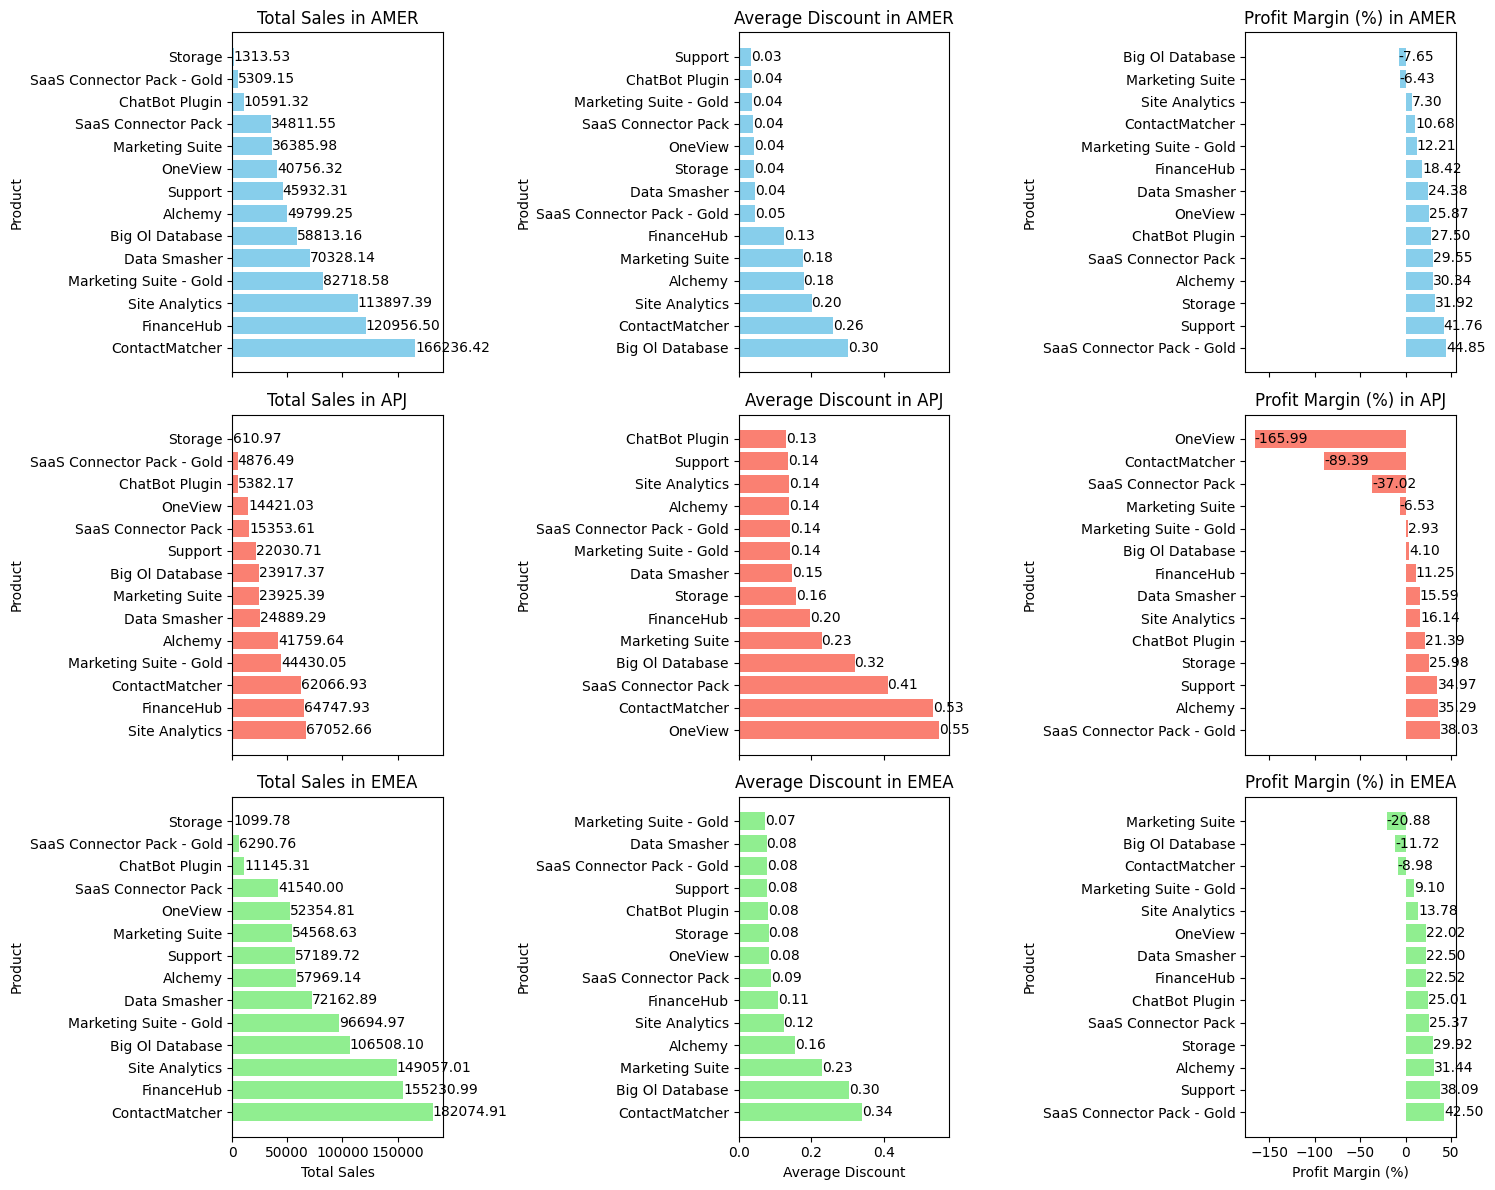

In [ ]:
import matplotlib.pyplot as plt

# Group data by Region and Product and calculate total sales, avg transaction size, and profit margin
region_product_summary = df_da.groupby(['Region', 'Product']).agg(
    total_sales=('Sales', 'sum'),
    discount=('Discount', 'mean'),
    profit_margin=('Profit_margin', 'mean')
).reset_index()

# Define metrics and labels for the loop
metrics = {
    'total_sales': 'Total Sales',
    'discount': 'Average Discount',
    'profit_margin': 'Profit Margin (%)'
}

regions = region_product_summary['Region'].unique()
num_metrics = len(metrics)
num_regions = len(regions)

# Set up 3x3 subplot grid
fig, axes = plt.subplots(num_regions, num_metrics, figsize=(15, 12), sharex='col')

# Loop through regions and metrics
for row, region in enumerate(regions):
    region_data = region_product_summary[region_product_summary['Region'] == region]

    for col, (metric, label) in enumerate(metrics.items()):
        ax = axes[row, col]

        # Sort data by the current metric for better readability
        sorted_data = region_data.sort_values(by=metric, ascending=False)

        # Plotting horizontal bar chart
        bars = ax.barh(sorted_data['Product'], sorted_data[metric], color=['skyblue', 'Salmon', 'lightgreen'][row])
        ax.set_ylabel('Product')
        ax.set_xlabel(label if row == num_regions - 1 else '')  # Only set x-label on the bottom row
        ax.set_title(f'{label} in {region}')

        # Display values next to each bar
        for bar in bars:
            xval = bar.get_width()
            ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.2f}', va='center', ha='left')

# Adjust layout
plt.tight_layout()
plt.show()


The charts above show that higher discounts are associated with lower profit margins, even leading to negative values. For instance, in the APJ region, the top five discounts (OneView, ContactMatcher, SaaS Connector Pack, Marketing suite) correspond to the top negative profit margins.

***This observation will be further examined through correlation analysis***

The main objective is to focus on APJ region. Hence, here's the recommendation:
- Reduce the high discount percentages on some products to a certain value so they don’t cause a negative profit margin. Consider setting a maximum discount threshold.



---


#### By Customer Characteristics

Market Segment Analysis:
- How does sales performance vary across different customer segments (e.g., SMB, Strategic, Enterprise) in each region?
- Which customer segment contributes the least to sales and profit within APJ, AMER, and EMEA?

Industry Analysis:
- Which industries show the lowest sales and profit margins within each region?
- Are there specific industries within APJ that underperform compared to the same industries in AMER and EMEA?



##### [Market Segment-level Analysis]

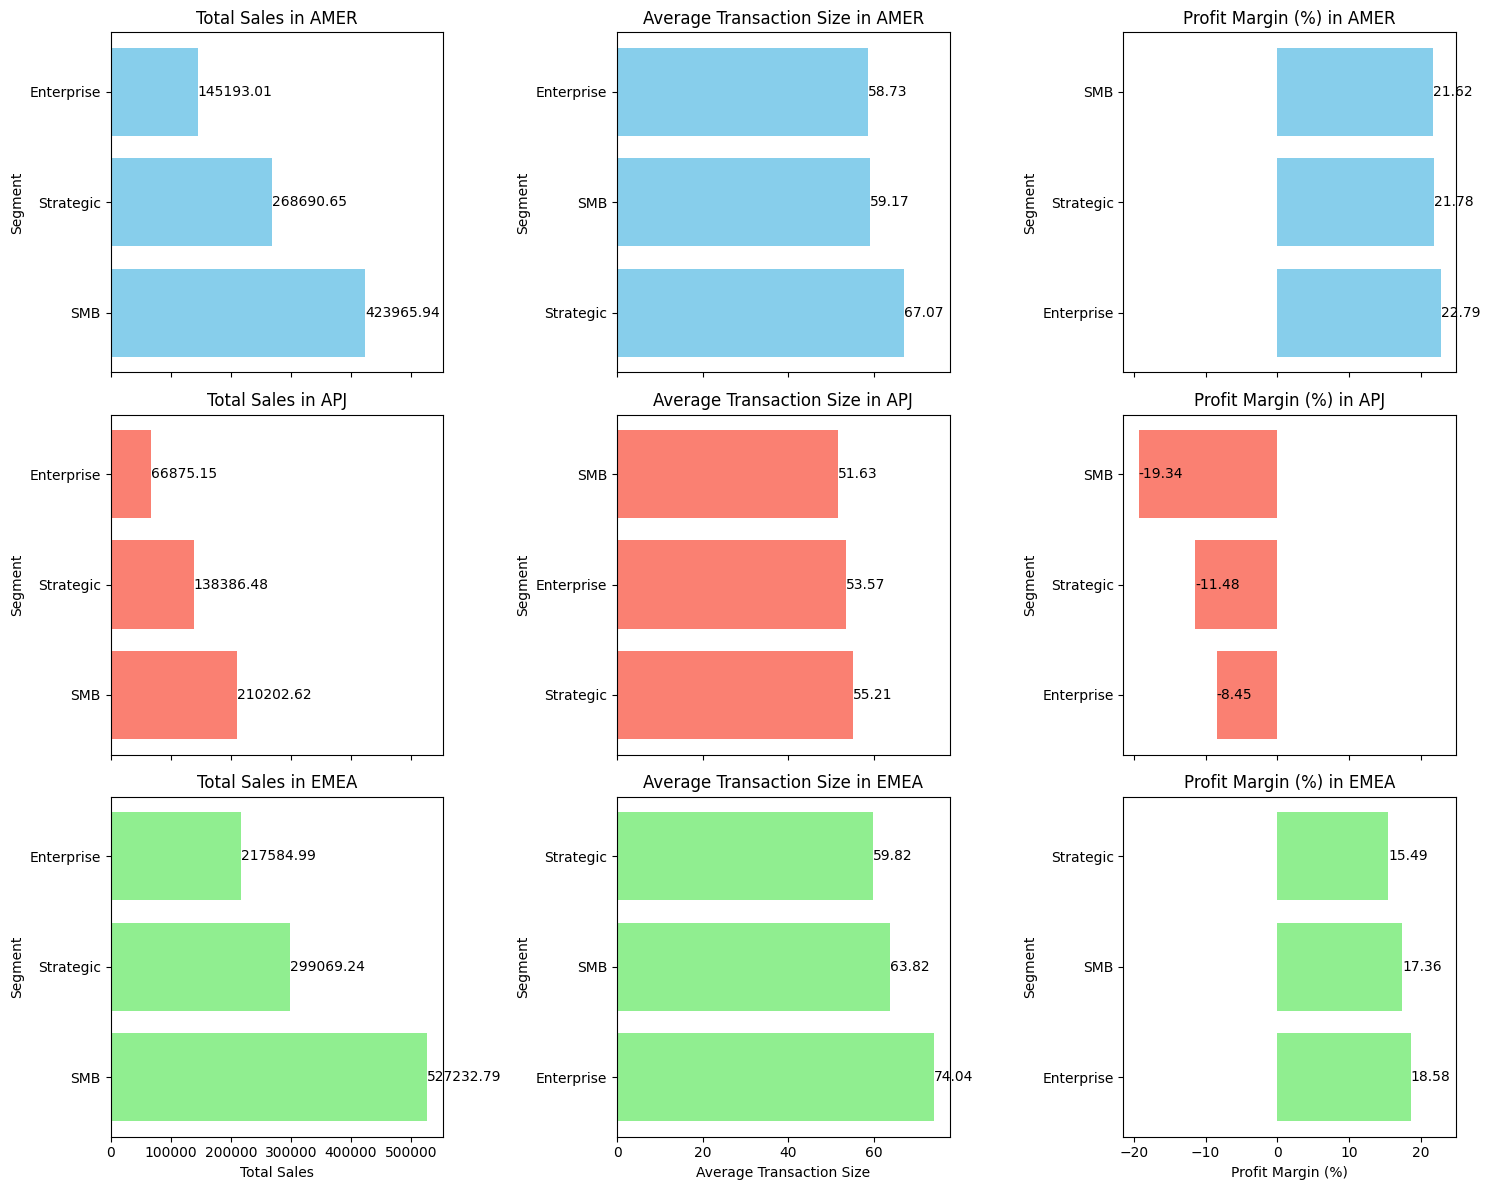

In [ ]:
import matplotlib.pyplot as plt

# Group data by Region and Segment and calculate total sales, avg transaction size, and profit margin
region_segment_summary = df_da.groupby(['Region', 'Segment']).agg(
    total_sales=('Sales', 'sum'),
    avg_transaction_size=('transaction_size', 'mean'),
    profit_margin=('Profit_margin', 'mean')
).reset_index()

# Define metrics and labels for the loop
metrics = {
    'total_sales': 'Total Sales',
    'avg_transaction_size': 'Average Transaction Size',
    'profit_margin': 'Profit Margin (%)'
}

regions = region_segment_summary['Region'].unique()
num_metrics = len(metrics)
num_regions = len(regions)

# Set up 3x3 subplot grid
fig, axes = plt.subplots(num_regions, num_metrics, figsize=(15, 12), sharex='col')

# Loop through regions and metrics
for row, region in enumerate(regions):
    region_data = region_segment_summary[region_segment_summary['Region'] == region]

    for col, (metric, label) in enumerate(metrics.items()):
        ax = axes[row, col]

        # Sort data by the current metric for better readability
        sorted_data = region_data.sort_values(by=metric, ascending=False)

        # Plotting horizontal bar chart
        bars = ax.barh(sorted_data['Segment'], sorted_data[metric], color=['skyblue', 'salmon', 'lightgreen'][row])
        ax.set_ylabel('Segment')
        ax.set_xlabel(label if row == num_regions - 1 else '')  # Only set x-label on the bottom row
        ax.set_title(f'{label} in {region}')

        # Display values next to each bar
        for bar in bars:
            xval = bar.get_width()
            ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.2f}', va='center', ha='left')

# Adjust layout
plt.tight_layout()
plt.show()


In the APJ region, every market segment shows a negative value, so all segments should be included in the upcoming strategy adjustments.

##### [Industry-level Analysis]

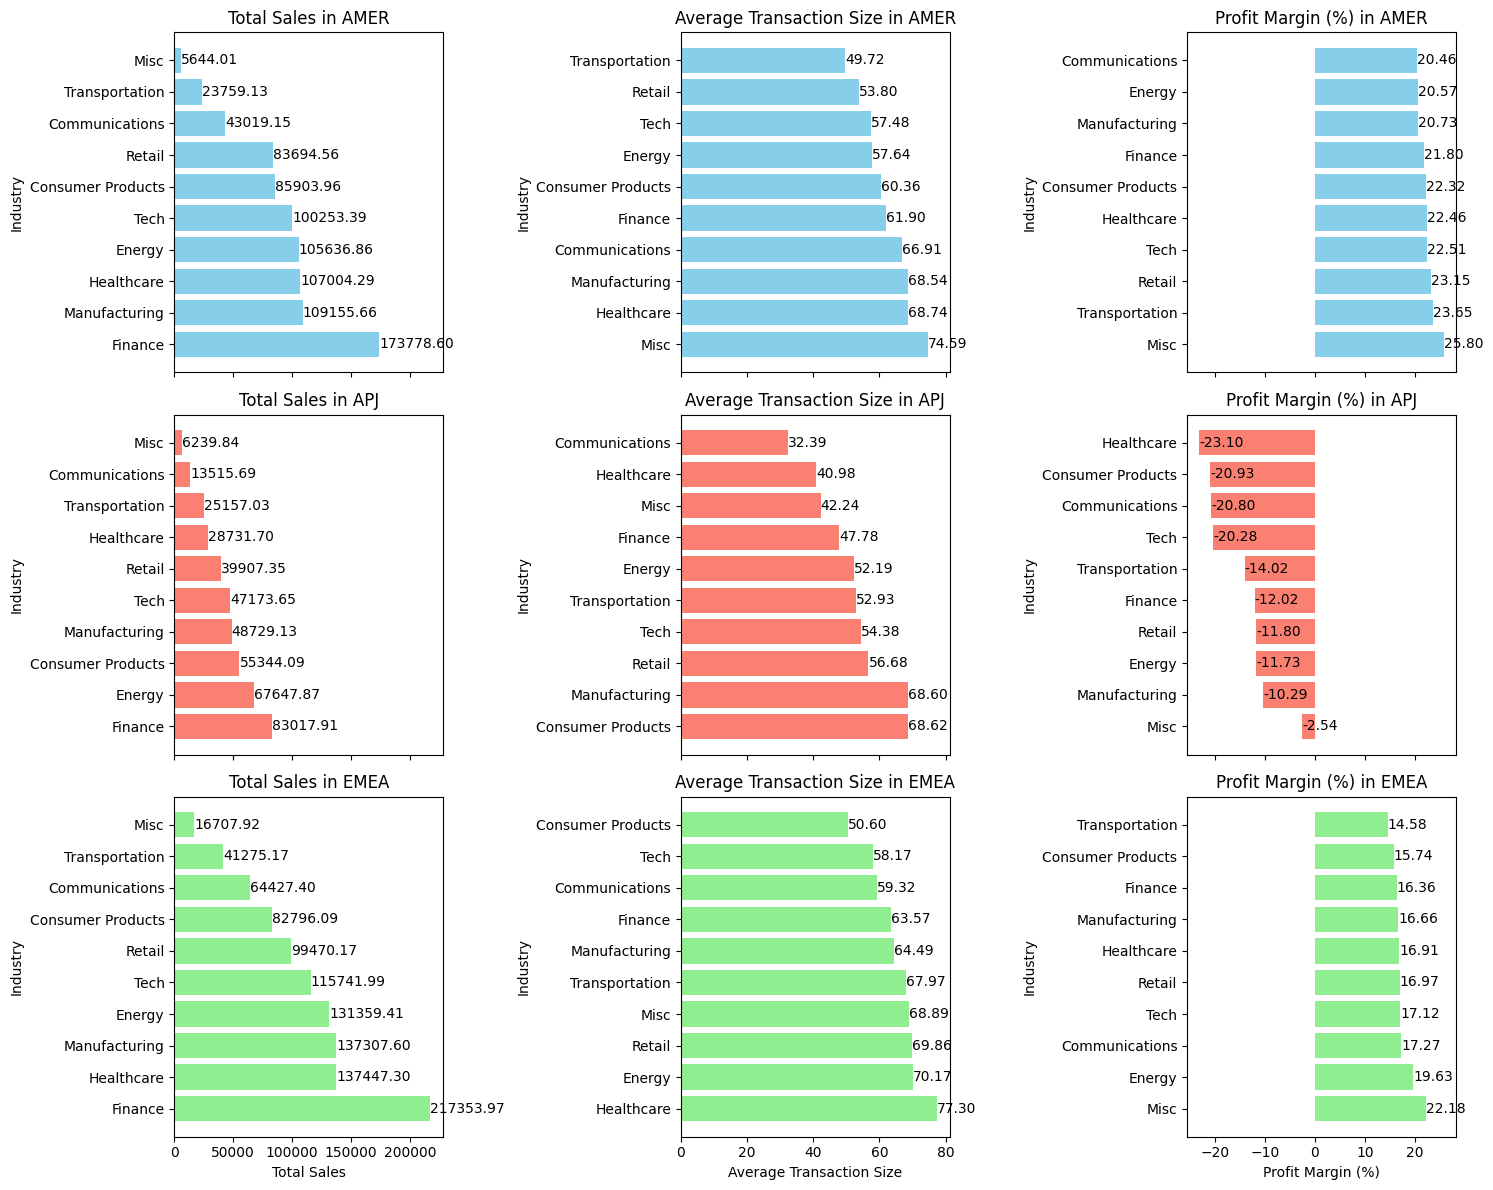

In [ ]:
import matplotlib.pyplot as plt

# Group data by Region and Industry and calculate total sales, avg transaction size, and profit margin
region_industry_summary = df_da.groupby(['Region', 'Industry']).agg(
    total_sales=('Sales', 'sum'),
    avg_transaction_size=('transaction_size', 'mean'),
    profit_margin=('Profit_margin', 'mean')
).reset_index()

# Define metrics and labels for the loop
metrics = {
    'total_sales': 'Total Sales',
    'avg_transaction_size': 'Average Transaction Size',
    'profit_margin': 'Profit Margin (%)'
}

regions = region_industry_summary['Region'].unique()
num_metrics = len(metrics)
num_regions = len(regions)

# Set up 3x3 subplot grid
fig, axes = plt.subplots(num_regions, num_metrics, figsize=(15, 12), sharex='col')

# Loop through regions and metrics
for row, region in enumerate(regions):
    region_data = region_industry_summary[region_industry_summary['Region'] == region]

    for col, (metric, label) in enumerate(metrics.items()):
        ax = axes[row, col]

        # Sort data by the current metric for better readability
        sorted_data = region_data.sort_values(by=metric, ascending=False)

        # Plotting horizontal bar chart
        bars = ax.barh(sorted_data['Industry'], sorted_data[metric], color=['skyblue', 'salmon', 'lightgreen'][row])
        ax.set_ylabel('Industry')
        ax.set_xlabel(label if row == num_regions - 1 else '')  # Only set x-label on the bottom row
        ax.set_title(f'{label} in {region}')

        # Display values next to each bar
        for bar in bars:
            xval = bar.get_width()
            ax.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.2f}', va='center', ha='left')

# Adjust layout
plt.tight_layout()
plt.show()


Every industry in the APJ region also shows a negative value, so all industry should be included in the upcoming strategy adjustments.



---


### 2) Correlation Analysis
Exploring the Relationship Between Discounts, Quantity, Sales Volume, and Profit in APJ to determine if discounting strategies are reducing profit margins.

In [ ]:
# Subset of data for APJ region and relevant columns
df_apj = df_da[df_da['Region'] == 'APJ'][['Discount', 'Quantity', 'Sales', 'Profit']]

Before conducting correlation analysis, I want to check the data's normality to determine which method to use. I will use histogram to check the normality.

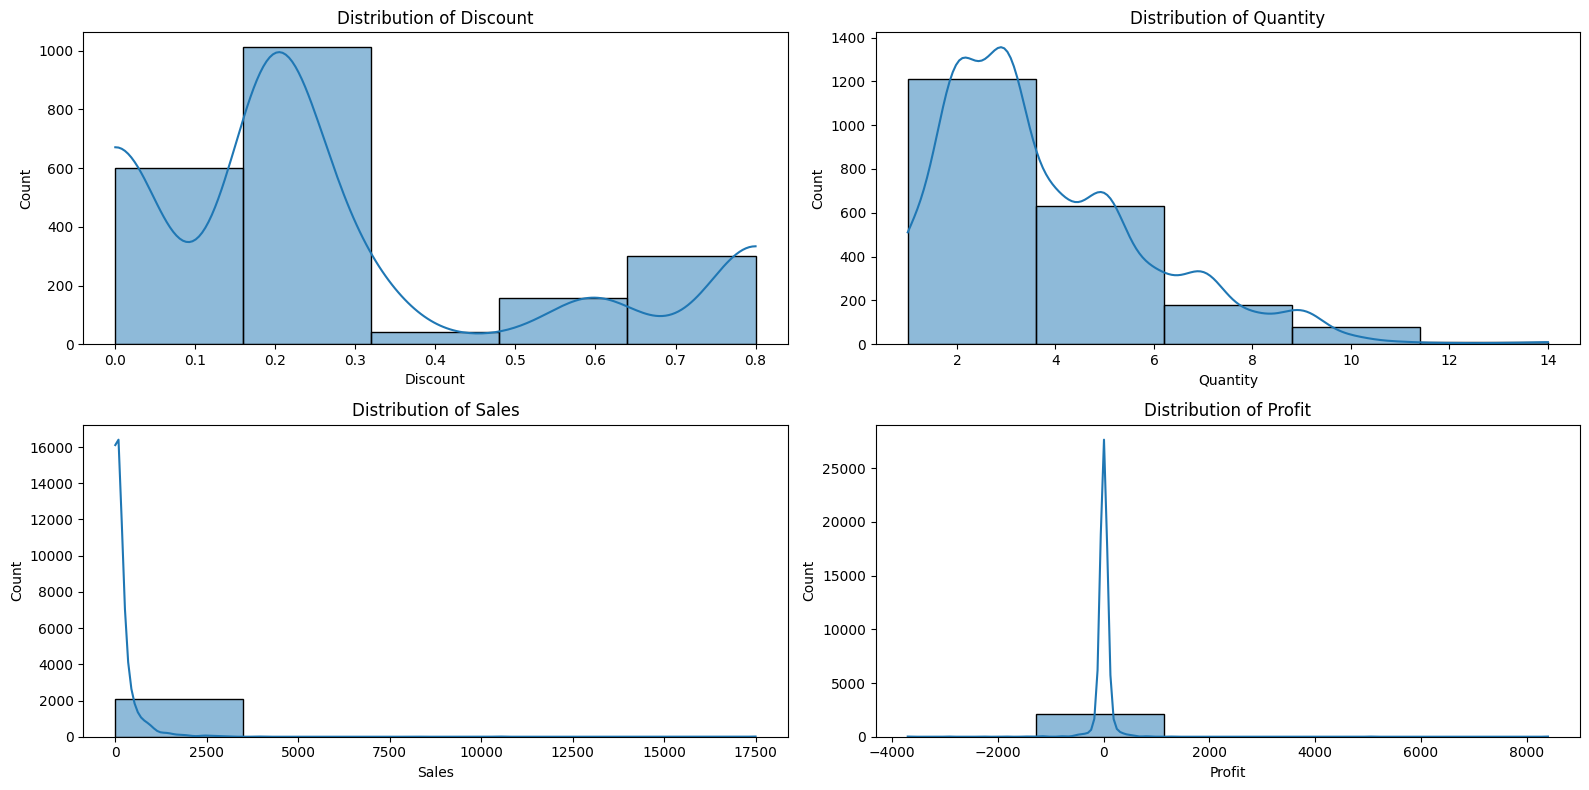

In [ ]:
columns = ['Discount', 'Quantity', 'Sales', 'Profit']

# Set up the figure with subplots
plt.figure(figsize=(16, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_apj, x=col, kde=True, bins=5)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The histogram shows that the data is not normally distributed; hence, we will use the **Spearman method** for correlation analysis.

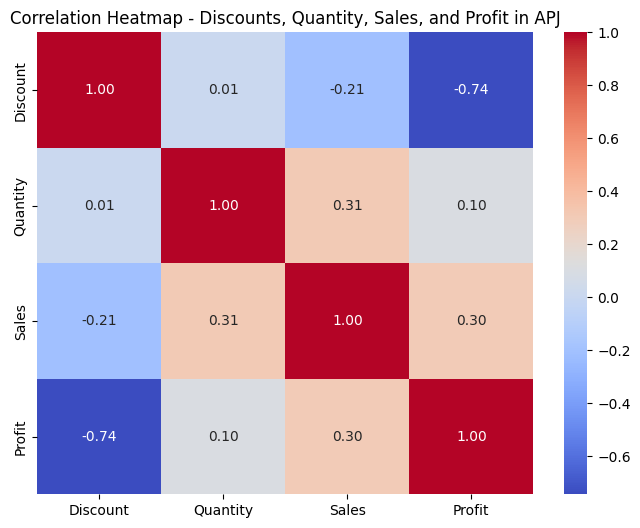

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_apj.corr(method='spearman')

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap - Discounts, Quantity, Sales, and Profit in APJ")
plt.show()

In [ ]:
df_apj[['Discount', 'Quantity', 'Sales', 'Profit']].corr(method = 'spearman')

,Discount,Quantity,Sales,Profit
Discount,1.000000,0.009358,-0.209017,-0.743032
Quantity,0.009358,1.000000,0.310495,0.103755
Sales,-0.209017,0.310495,1.000000,0.301904
Profit,-0.743032,0.103755,0.301904,1.000000


Summary:
- There is a strong negative correlation between Discount and Profit (-0.74), indicating that as the discount increases, profit tends to decrease.
- There is a weak negative correlation between Sales and Discount (-0.21), suggesting that as Discount increase, Sales slightly decreases -> this might because of high Discounts Leading to Low Sales or increased Sales of Lower-Margin Products.
- There is a weak positive correlation between Quantity and Sales(0.31), suggesting that as quantity increase, Sales slightly increases.
- There is a weak positive correlation between Quantity and Profit (0.1), suggesting that as quantity increase, Profit slightly increases.

In [ ]:
# Calculate the median of the 'Discount' column
discount_median = df_apj['Discount'].median()
print(f'discount_median: {discount_median}')

# Create a new column 'Discount_Level' with 'High' and 'Low' values based on the median threshold
df_apj['Discount_Level'] = df_apj['Discount'].apply(lambda x: 'High' if x >= discount_median else 'Low')

# Display the updated DataFrame
print(df_apj[['Discount', 'Discount_Level']].head())


discount_median: 0.2
    Discount Discount_Level
14       0.8           High
15       0.8           High
34       0.2           High
35       0.2           High
36       0.6           High


In [ ]:
from scipy.stats import ttest_ind

# Separate the 'Profit' values for High and Low discount levels
high_discount_profit = df_apj[df_apj['Discount_Level'] == 'High']['Profit']
low_discount_profit = df_apj[df_apj['Discount_Level'] == 'Low']['Profit']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(high_discount_profit, low_discount_profit, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Profit between High and Low discount levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Profit between High and Low discount levels.")


T-Statistic: -6.272341636338483
P-Value: 6.234971312123289e-10
Reject the null hypothesis: There is a significant difference in Profit between High and Low discount levels.


- From the T-test, we know that there is a statistically significant difference in Profit between high (≥ 0.2) and low (< 0.2) discount levels. This supports the correlation analysis, confirming that **discount levels significantly impact profit.**
- Since 0.2 was identified as the median discount, discounts at or above this threshold are classified as "High" and are associated with significantly lower profits. This implies that **discounts greater than or equal to 20% likely cross a threshold where they begin to negatively affect profitability**

In [ ]:
df_apj[['Discount', 'Discount_Level', 'Profit']]

,Discount,Discount_Level,Profit
14,0.80,High,-123.8580
15,0.80,High,-3.8160
34,0.20,High,9.9468
35,0.20,High,123.4737
36,0.60,High,-147.9630
...,...,...,...
9962,0.32,High,-67.6704
9964,0.00,Low,6.4320
9965,0.00,Low,2.3406
9966,0.00,Low,51.5543


In [ ]:
df_apj_low_discount = df_apj[(df_apj['Discount_Level'] == 'Low') & (df_apj['Profit'] < 0)]
df_apj_low_discount[['Discount', 'Discount_Level', 'Profit']]

,Discount,Discount_Level,Profit


Based on the filtered data, we observe that only "High" discounts are associated with negative profits, while "Low" discounts show no data of negative profit. This finding reinforces our previous analysis.

For the final conclusion:
- There is a strong negative relationship between Discount and Profit; as discounts rise, profits generally decline.
- "High" discounts (above the median of 0.2) start to negatively affect profitability.



---

## SUMMARY & RECOMMENDATION

Summaries:
- Compared to AMER and EMEA, APJ has the lowest total sales, average transaction size, and profit margin, while having the highest average discount.For profit margin, only APJ has an overall negative value.
- In the APJ region, every market segment and industry shows a negative value.
- Japan and Australia have negative profit margins (all negative profit margins come from Japan and Australia — the top 22 by city and country) due to higher discounts (the top 23 discounts by city and country are dominated by Japan and Australia).
- The product data shows that higher discounts are linked to lower profit margins, sometimes causing losses (negative value).
- There is a strong negative correlation between discount and profit (-0.74), indicating that higher discounts significantly reduce profits.
- Sales show a weak negative correlation with discount (-0.21), possibly due to either high discounts leading to lower sales or increased sales of lower-margin products.
- Quantity has weak positive correlations with both sales (0.31) and profit (0.1), suggesting that as quantity increases, sales and profit experience slight gains.
- "High" discounts (above 20%) start to negatively affect profitability.


---


Recommendations:

1) Setting a cap to reduce High Discounts:
- consider setting a cap on discounts at or below 20% in order to prevent negative profit margin and boost profitability.

2) Adjust Discount Strategies by Product:

Try lowering discounts on low-margin products and offering moderate discounts on higher-margin products especially in APJ region.
- set discount below 10% for OneView, ContactMatcher, SaaS Connector Pack, Marketing suite due to negative profitability in the previous performance.
- set discount 20-25% for product with high profit margin, but low sales to boost sales, for example support and storage.

3) Set Strategies for Japan and Australia:

These two markets drive the highest discounts and correlate with the highest negative profit margins.
- keep the discount below 20% cap to prevent negative profit margin.

4) Encourage Bulk Purchase / increase sales volume:

Given the weak positive correlation between quantity and both sales and profit, consider offering promotions for larger orders or high quantities with reasonable discounts.

5) Monitor Sales Impact of Discounts: Since sales show a weak negative correlation with high discounts
- test smaller discounts or time-limited offers to boost sales.